# Challenge - Time Series Analysis

In [15]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.1'

In [16]:
dexuseu_data = pd.read_csv('DEXUSEU.csv')

dexuseu_data['Price'] = pd.to_numeric(dexuseu_data.DEXUSEU, errors='coerce')

dexuseu_data.dropna(inplace=True)

In [17]:
dexuseu_data.head()

,DATE,DEXUSEU,Price
0,2014-10-06,1.2592,1.2592
1,2014-10-07,1.2626,1.2626
2,2014-10-08,1.2683,1.2683
3,2014-10-09,1.2683,1.2683
4,2014-10-10,1.2636,1.2636


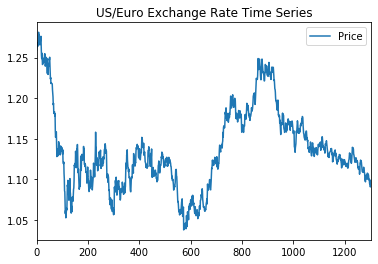

In [18]:
dexuseu_data.plot()
plt.title('US/Euro Exchange Rate Time Series')
plt.show()

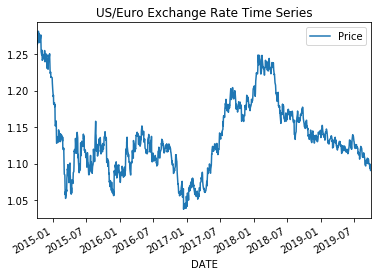

In [19]:
dexuseu_data.index = pd.to_datetime(dexuseu_data.DATE)
dexuseu_data.plot()
plt.title('US/Euro Exchange Rate Time Series')
plt.show()

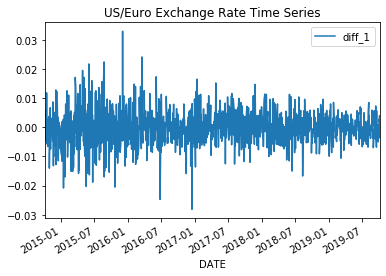

In [20]:
dexuseu_data['diff_1'] = dexuseu_data.Price - dexuseu_data.Price.shift()
dexuseu_data.plot(y='diff_1')
plt.title('US/Euro Exchange Rate Time Series')
plt.show()

Text(0.5, 1.0, 'US/Euro Exchange Rate PACF')

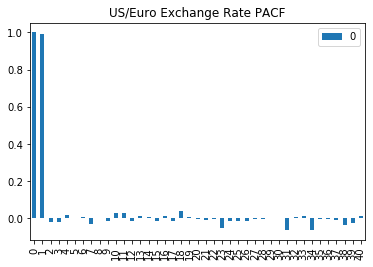

In [21]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(dexuseu_data.Price))
x_acf.plot(kind='bar')
plt.title('US/Euro Exchange Rate PACF')

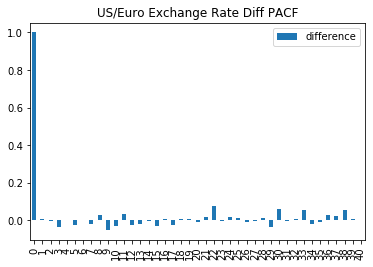

In [22]:
x_acf = pd.DataFrame(pacf(dexuseu_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title('US/Euro Exchange Rate Diff PACF')
plt.legend(['difference'])

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dexuseu_data.Price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1249
Model:                     ARMA(1, 0)   Log Likelihood                4619.752
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 09 Oct 2019   AIC                          -9233.505
Time:                        03:30:19   BIC                          -9218.114
Sample:                             0   HQIC                         -9227.719
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1454      0.027     42.787      0.000       1.093       1.198
ar.L1.Price     0.9944      0.003    317.402      0.000       0.988       1.000
                                    Roots       

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dexuseu_data.Price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 1248
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4617.176
Method:                           css   S.D. of innovations              0.006
Date:                Wed, 09 Oct 2019   AIC                          -9230.351
Time:                        03:29:58   BIC                          -9220.093
Sample:                             1   HQIC                         -9226.494
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.765      0.444      -0.000       0.000
Residuals Description
count    1.248000e+03
mean     2.313527e-10
std      5.986803e-03
min     -2.797035e-02
25%     -3.470352e-03

In [30]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dexuseu_data.Price, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1249
Model:                     ARMA(0, 1)   Log Likelihood                2731.409
Method:                       css-mle   S.D. of innovations              0.027
Date:                Wed, 09 Oct 2019   AIC                          -5456.819
Time:                        18:23:33   BIC                          -5441.428
Sample:                             0   HQIC                         -5451.033
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1361      0.001    775.490      0.000       1.133       1.139
ma.L1.Price     0.9080      0.008    111.709      0.000       0.892       0.924
                                    Roots       

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dexuseu_data.Price, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1249
Model:                     ARMA(1, 1)   Log Likelihood                4619.873
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 09 Oct 2019   AIC                          -9231.745
Time:                        03:30:36   BIC                          -9211.225
Sample:                             0   HQIC                         -9224.030
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1451      0.026     43.508      0.000       1.094       1.197
ar.L1.Price     0.9942      0.003    309.488      0.000       0.988       1.000
ma.L1.Price     0.0140      0.028      0.490    

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dexuseu_data.Price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 1248
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4617.592
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 09 Oct 2019   AIC                          -9227.184
Time:                        03:31:06   BIC                          -9206.667
Sample:                             1   HQIC                         -9219.470
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.000     -0.852      0.394      -0.000       0.000
ar.L1.D.Price     0.8676      0.113      7.676      0.000       0.646       1.089
ma.L1.D.Price    -0.8804      0.107     

The model with order=(0,0,1) has the best overall performance, since its log likelihood value is the closest to zero.